# ECG Anomaly Detection

In [2]:
from fermat_utils import *
from dynamical_systems_utils import *

### ECG time series

In [3]:
s = np.loadtxt('data/qtdbsel102.txt')

In [4]:
s=s[:,2]

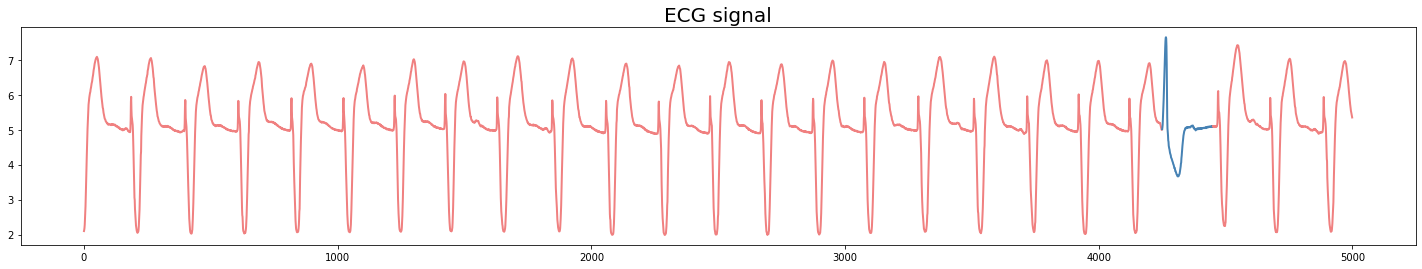

In [5]:
plt.figure(figsize=(25,4))
t1=4250
t2=4450
plt.plot(range(0,t1), s[:t1], color='lightcoral', linewidth=2)
plt.plot(range(t1,t2), s[t1:t2], color='steelblue', linewidth=2)
plt.plot(range(t2,5000), s[t2:5000], color='lightcoral', linewidth=2)
plt.title('ECG signal', fontsize=20)
plt.show()

### Delay embedding

Given a time series $y(t)$ and two integers $d$ (the embedding dimension) and $T$ (the time delay parameter), for any time $t_i \in (t_0, t_1, \ldots ),$ consider the values of the variable $y$ at $d$ distinct times, evenly spaced by $T$ and starting at $t_i$, to construct $$Y_{t_i} = (y_{t_i}, y_{t_i + T}, \ldots , y_{t_i + (D-1)T}).$$

In [6]:
T=15
d=3

X1 = delay_embedding(s[0:t1], T, d)
X2 = delay_embedding(s[t1-2*T:t2+2*T], T, d)
X3 = delay_embedding(s[t2-2*T:5000], T, d)

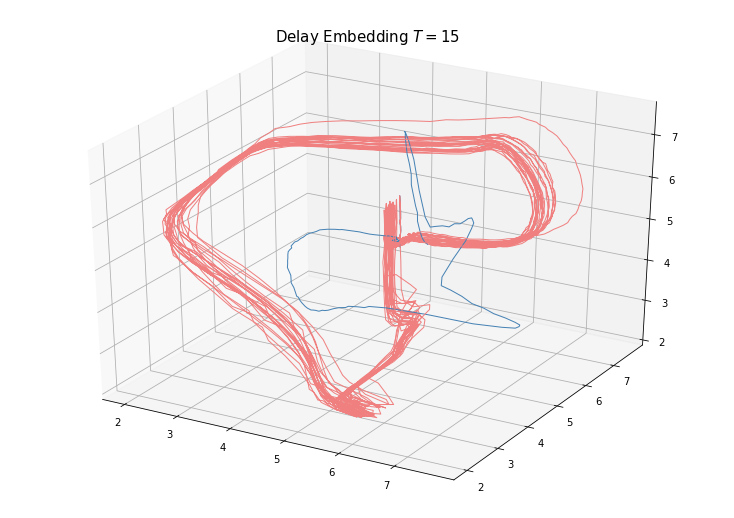

In [12]:
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.plot(X1[0], X1[1], X1[2], color='lightcoral', linewidth=1)
ax.plot(X2[0], X2[1], X2[2], color='steelblue', linewidth=1)
ax.plot(X3[0], X3[1], X3[2], color='lightcoral', linewidth=1)
plt.title('Delay Embedding $T=15$', size=15)
plt.show()

### Persistence diagrams

#### **Period of time [0,4000]**

In [15]:
X = delay_embedding(s[0:4000], T, d, 2)
embedding = np.column_stack((X[0], X[1], X[2]))

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


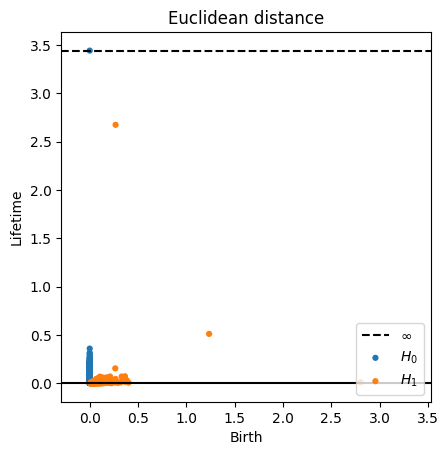

In [16]:
rips = Rips()
dgms = rips.fit_transform(embedding)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean distance')
plt.show()

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


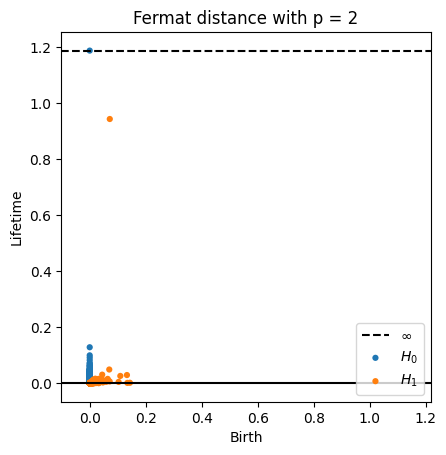

In [20]:
dgm1 = Fermat_dgm(embedding, 2)

#### **Period [0,5000]**

In [21]:
X2 = delay_embedding(s[0:5000], 15, 3, 2)
embedding_anomaly = np.column_stack((X2[0], X2[1], X2[2]))

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


Text(0.5, 1.0, 'Euclidean distance')

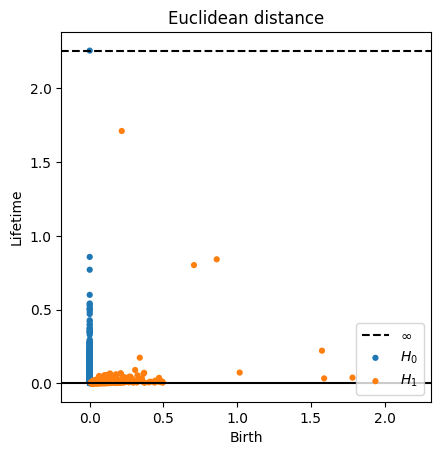

In [22]:
rips = Rips()
dgms = rips.fit_transform(embedding_anomaly)
rips.plot(dgms, lifetime=True)
plt.title('Euclidean distance')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


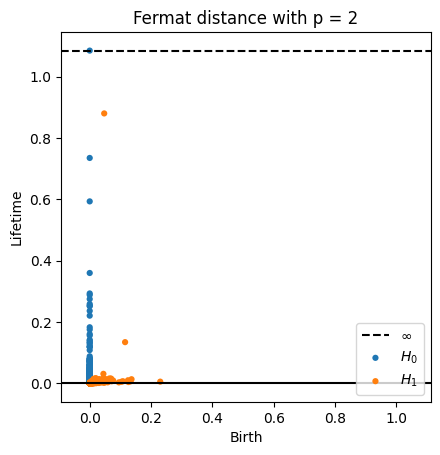

In [23]:
dgm2 = Fermat_dgm(embedding_anomaly, 2)